<a href="https://colab.research.google.com/github/InbalBolshinsky/multi-modal-mutation-detector/blob/main/notebooks/LungCancer_ClinVar_DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the VCF file from ClinVar and extracting it.

In [37]:
import os

# File URL
url = "ftp://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/clinvar.vcf.gz"

# Check if the file exists
if not os.path.exists("clinvar.vcf.gz"):
    # Download the file
    !wget -O clinvar.vcf.gz {url}
    print("File downloaded.")
else:
    print("File already exists, skipping download.")

# Decompress the file
!gunzip -f clinvar.vcf.gz


--2024-12-15 20:12:02--  ftp://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/clinvar.vcf.gz
           => ‘clinvar.vcf.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/clinvar/vcf_GRCh38 ... done.
==> SIZE clinvar.vcf.gz ... 104979789
==> PASV ... done.    ==> RETR clinvar.vcf.gz ... done.
Length: 104979789 (100M) (unauthoritative)

clinvar.vcf.gz      100%[===================>] 100.12M  50.3MB/s    in 2.0s    

2024-12-15 20:12:05 (50.3 MB/s) - ‘clinvar.vcf.gz’ saved [104979789]

File downloaded.


In [ ]:
!wget ftp://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/clinvar.vcf.gz

--2024-12-15 20:06:43--  ftp://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/clinvar.vcf.gz
           => ‘clinvar.vcf.gz.1’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/clinvar/vcf_GRCh38 ... done.
==> SIZE clinvar.vcf.gz ... 104979789
==> PASV ... done.    ==> RETR clinvar.vcf.gz ... done.
Length: 104979789 (100M) (unauthoritative)

clinvar.vcf.gz.1    100%[===================>] 100.12M  51.7MB/s    in 1.9s    

2024-12-15 20:06:46 (51.7 MB/s) - ‘clinvar.vcf.gz.1’ saved [104979789]



In [ ]:
!gunzip clinvar.vcf.gz


gzip: clinvar.vcf.gz: not in gzip format


Viewing clinvar.vcf head:

In [38]:
!grep "CLNDN=" clinvar.vcf | head

1	69134	2205837	A	G	.	.	ALLELEID=2193183;CLNDISDB=MedGen:CN169374;CLNDN=not_specified;CLNHGVS=NC_000001.11:g.69134A>G;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Likely_benign;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=OR4F5:79501;MC=SO:0001583|missense_variant;ORIGIN=1
1	69314	3205580	T	G	.	.	ALLELEID=3374047;CLNDISDB=MedGen:CN169374;CLNDN=not_specified;CLNHGVS=NC_000001.11:g.69314T>G;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=OR4F5:79501;MC=SO:0001583|missense_variant;ORIGIN=1
1	69423	3205581	G	A	.	.	ALLELEID=3374048;CLNDISDB=MedGen:CN169374;CLNDN=not_specified;CLNHGVS=NC_000001.11:g.69423G>A;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Uncertain_significance;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=OR4F5:79501;MC=SO:0001583|missense_variant;ORIGIN=1
1	69581	2252161	C	G	.	.	ALLELEID=2238986;CLNDISDB=MedGen:CN169374;CLNDN=not_specified;CL

Install Required Libraries and Import Modules

In [ ]:
# Install necessary libraries
!pip install pysam

# Import required modules
import pysam
import pandas as pd
import os


Load the VCF File into a DataFrame

In [ ]:
vcf_file = "clinvar.vcf"
columns = ["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO"]

# Use Pandas to read the VCF file
df = pd.read_csv(vcf_file, sep="\t", comment='#', names=columns, dtype={'CHROM': str}, low_memory=False)

Parse the INFO Field

In [ ]:
# Parse INFO column into separate key-value pairs
def parse_info(info):
    parsed = {}
    for entry in info.split(";"):
        if "=" in entry:
            key, value = entry.split("=", 1)
            parsed[key] = value
    return parsed

# Apply parse_info to the INFO column
df["INFO"] = df["INFO"].apply(parse_info)

# Expand parsed INFO into separate columns
info_df = pd.DataFrame(df["INFO"].tolist(), index=df.index)
df = pd.concat([df.drop(columns=["INFO"]), info_df], axis=1)

In [ ]:
info_df.head()


,ALLELEID,CLNDISDB,CLNDN,CLNHGVS,CLNREVSTAT,CLNSIG,CLNVC,CLNVCSO,GENEINFO,MC,...,ONCDN,ONCREVSTAT,SCI,SCIREVSTAT,DBVARID,SCIDISDB,SCIDN,ONCDISDBINCL,ONCDNINCL,ONCINCL
0,2193183,MedGen:CN169374,not_specified,NC_000001.11:g.69134A>G,"criteria_provided,_single_submitter",Likely_benign,single_nucleotide_variant,SO:0001483,OR4F5:79501,SO:0001583|missense_variant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3374047,MedGen:CN169374,not_specified,NC_000001.11:g.69314T>G,"criteria_provided,_single_submitter",Uncertain_significance,single_nucleotide_variant,SO:0001483,OR4F5:79501,SO:0001583|missense_variant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3374048,MedGen:CN169374,not_specified,NC_000001.11:g.69423G>A,"criteria_provided,_single_submitter",Uncertain_significance,single_nucleotide_variant,SO:0001483,OR4F5:79501,SO:0001583|missense_variant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2238986,MedGen:CN169374,not_specified,NC_000001.11:g.69581C>G,"criteria_provided,_single_submitter",Uncertain_significance,single_nucleotide_variant,SO:0001483,OR4F5:79501,SO:0001583|missense_variant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2386655,MedGen:CN169374,not_specified,NC_000001.11:g.69682G>A,"criteria_provided,_single_submitter",Uncertain_significance,single_nucleotide_variant,SO:0001483,OR4F5:79501,SO:0001583|missense_variant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check for Missing Columns and Pre-Filter Data

In [ ]:
# Check for missing columns and handle them
if "GENEINFO" not in df.columns:
    print("Warning: GENEINFO column is missing. Please verify the VCF file format.")
    df["GENEINFO"] = None

if "CLNSIG" not in df.columns:
    print("Warning: CLNSIG column is missing. Please verify the VCF file format.")
    df["CLNSIG"] = None

# Pre-filter rows with non-null GENEINFO
df = df[df["GENEINFO"].notna()]

Define Genes and Classifications

In [ ]:
# Define relevant genes and classifications
genes_of_interest = ["EGFR", "KRAS", "ALK"]
classifications = {
    "Pathogenic/Likely Pathogenic": ["Pathogenic", "Likely_pathogenic"],
    "Benign/Likely Benign": ["Benign", "Likely_benign"],
    "VUS": ["Uncertain_significance"]
}

Filter Data by Gene and Classification

In [ ]:
# Filter Data by Gene and Classification
filtered_dfs = {}
for gene in genes_of_interest:
    for classification_name, classification_values in classifications.items():
        # Filter for specific gene and classification
        gene_class_mask = (
            df["GENEINFO"].str.contains(gene, na=False) &
            df["CLNSIG"].isin(classification_values)
        )
        key = f"{gene}_{classification_name.replace(' ', '_')}"
        filtered_dfs[key] = df[gene_class_mask]

Save Filtered DataFrames

In [ ]:
# Define genes and classifications
genes_of_interest = ["EGFR", "KRAS", "ALK"]
classifications = {
    "Pathogenic/Likely Pathogenic": ["Pathogenic", "Likely_pathogenic"],
    "Benign/Likely Benign": ["Benign", "Likely_benign"],
    "VUS": ["Uncertain_significance"]
}

# Create DataFrames for each gene and classification combination
EGFR_Pathogenic = df[(df["GENEINFO"].str.contains("EGFR", na=False)) & (df["CLNSIG"].isin(classifications["Pathogenic/Likely Pathogenic"]))]
EGFR_Benign = df[(df["GENEINFO"].str.contains("EGFR", na=False)) & (df["CLNSIG"].isin(classifications["Benign/Likely Benign"]))]
EGFR_VUS = df[(df["GENEINFO"].str.contains("EGFR", na=False)) & (df["CLNSIG"].isin(classifications["VUS"]))]

KRAS_Pathogenic = df[(df["GENEINFO"].str.contains("KRAS", na=False)) & (df["CLNSIG"].isin(classifications["Pathogenic/Likely Pathogenic"]))]
KRAS_Benign = df[(df["GENEINFO"].str.contains("KRAS", na=False)) & (df["CLNSIG"].isin(classifications["Benign/Likely Benign"]))]
KRAS_VUS = df[(df["GENEINFO"].str.contains("KRAS", na=False)) & (df["CLNSIG"].isin(classifications["VUS"]))]

ALK_Pathogenic = df[(df["GENEINFO"].str.contains("ALK", na=False)) & (df["CLNSIG"].isin(classifications["Pathogenic/Likely Pathogenic"]))]
ALK_Benign = df[(df["GENEINFO"].str.contains("ALK", na=False)) & (df["CLNSIG"].isin(classifications["Benign/Likely Benign"]))]
ALK_VUS = df[(df["GENEINFO"].str.contains("ALK", na=False)) & (df["CLNSIG"].isin(classifications["VUS"]))]

# Verify the counts
print("EGFR_Pathogenic:", len(EGFR_Pathogenic))  # Expected: 119
print("EGFR_Benign:", len(EGFR_Benign))          # Expected: 1292
print("EGFR_VUS:", len(EGFR_VUS))                # Expected: 1409

print("KRAS_Pathogenic:", len(KRAS_Pathogenic))  # Expected: 62
print("KRAS_Benign:", len(KRAS_Benign))          # Expected: 146
print("KRAS_VUS:", len(KRAS_VUS))                # Expected: 198

print("ALK_Pathogenic:", len(ALK_Pathogenic))    # Expected: 131
print("ALK_Benign:", len(ALK_Benign))            # Expected: 2458
print("ALK_VUS:", len(ALK_VUS))                  # Expected: 3432


EGFR_Pathogenic: 119
EGFR_Benign: 1292
EGFR_VUS: 1409
KRAS_Pathogenic: 62
KRAS_Benign: 146
KRAS_VUS: 198
ALK_Pathogenic: 131
ALK_Benign: 2458
ALK_VUS: 3432


In [ ]:
df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,ALLELEID,CLNDISDB,CLNDN,...,ONCDN,ONCREVSTAT,SCI,SCIREVSTAT,DBVARID,SCIDISDB,SCIDN,ONCDISDBINCL,ONCDNINCL,ONCINCL
0,1,69134,2205837,A,G,.,.,2193183,MedGen:CN169374,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,69314,3205580,T,G,.,.,3374047,MedGen:CN169374,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,69423,3205581,G,A,.,.,3374048,MedGen:CN169374,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,69581,2252161,C,G,.,.,2238986,MedGen:CN169374,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,69682,2396347,G,A,.,.,2386655,MedGen:CN169374,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


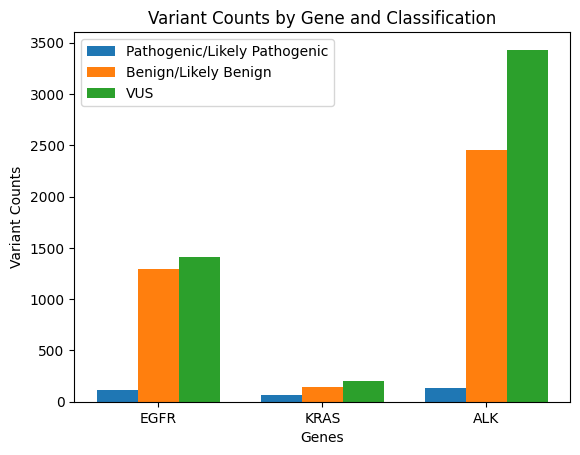

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
genes = ["EGFR", "KRAS", "ALK"]
pathogenic_counts = [119, 62, 131]
benign_counts = [1292, 146, 2458]
vus_counts = [1409, 198, 3432]

# Plotting
bar_width = 0.25
x = range(len(genes))

plt.bar(x, pathogenic_counts, width=bar_width, label="Pathogenic/Likely Pathogenic")
plt.bar([p + bar_width for p in x], benign_counts, width=bar_width, label="Benign/Likely Benign")
plt.bar([p + 2 * bar_width for p in x], vus_counts, width=bar_width, label="VUS")

plt.xticks([p + bar_width for p in x], genes)
plt.xlabel("Genes")
plt.ylabel("Variant Counts")
plt.title("Variant Counts by Gene and Classification")
plt.legend()
plt.show()

In [ ]:
# Define relevant genes and classifications
genes_of_interest = ["EGFR", "KRAS", "ALK"]
classifications = {
    "Pathogenic/Likely_Pathogenic": ["Pathogenic", "Likely_pathogenic"],
    "Benign/Likely_Benign": ["Benign", "Likely_benign"],
    "VUS": ["Uncertain_significance"]
}

# Initialize dictionary to store filtered DataFrames
filtered_dfs = {}

# Process data for each gene and classification
for gene in genes_of_interest:
    print(f"Processing gene: {gene}")
    for classification_name, classification_values in classifications.items():
        # Filter data for specific gene and classification
        filtered_df = df[
            (df["GENEINFO"].str.contains(gene, na=False)) &
            (df["CLNSIG"].isin(classification_values))
        ]
        count = len(filtered_df)
        print(f"{gene}_{classification_name.replace(' ', '_')}: {count}")
        # Store the filtered DataFrame in the dictionary
        key = f"{gene}_{classification_name.replace(' ', '_')}"
        filtered_dfs[key] = filtered_df
#please restore here

Processing gene: EGFR
EGFR_Pathogenic/Likely_Pathogenic: 119
EGFR_Benign/Likely_Benign: 1292
EGFR_VUS: 1409
Processing gene: KRAS
KRAS_Pathogenic/Likely_Pathogenic: 62
KRAS_Benign/Likely_Benign: 146
KRAS_VUS: 198
Processing gene: ALK
ALK_Pathogenic/Likely_Pathogenic: 131
ALK_Benign/Likely_Benign: 2458
ALK_VUS: 3432


Inspecting DataFrames:

In [ ]:
for df_name, df in [('EGFR_Pathogenic', EGFR_Pathogenic),
                    ('EGFR_Benign', EGFR_Benign),
                    ('EGFR_VUS', EGFR_VUS),
                    ('KRAS_Pathogenic', KRAS_Pathogenic),
                    ('KRAS_Benign', KRAS_Benign),
                    ('KRAS_VUS', KRAS_VUS),
                    ('ALK_Pathogenic', ALK_Pathogenic),
                    ('ALK_Benign', ALK_Benign),
                    ('ALK_VUS', ALK_VUS)]:
    print(f"--------------{df_name} Summary: ------------------")
    print(df.describe())
    print(df.info())
    print("\n")


--------------EGFR_Pathogenic Summary: ------------------
       POS   ID
count  0.0  0.0
mean   NaN  NaN
std    NaN  NaN
min    NaN  NaN
25%    NaN  NaN
50%    NaN  NaN
75%    NaN  NaN
max    NaN  NaN
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CHROM         0 non-null      object
 1   POS           0 non-null      int64 
 2   ID            0 non-null      int64 
 3   REF           0 non-null      object
 4   ALT           0 non-null      object
 5   QUAL          0 non-null      object
 6   FILTER        0 non-null      object
 7   ALLELEID      0 non-null      object
 8   CLNDISDB      0 non-null      object
 9   CLNDN         0 non-null      object
 10  CLNHGVS       0 non-null      object
 11  CLNREVSTAT    0 non-null      object
 12  CLNSIG        0 non-null      object
 13  CLNVC         0 non-null      object
 14  CLNVCSO       0 non-null      obj

In [ ]:
# Drop uninformative columns
uninformative_cols = ["FILTER", "SCI", "SCIREVSTAT", "DBVARID", "SCIDISDB", "SCIDN", "ONCDISDBINCL", "ONCDNINCL", "ONCINCL"]
df = df.drop(columns=uninformative_cols, errors='ignore')


In [ ]:
# Fill missing values with a placeholder
df["CLNDISDB"] = df["CLNDISDB"].fillna("Unknown")
df["CLNDN"] = df["CLNDN"].fillna("Unknown")


In [ ]:
# Select important columns
important_cols = ["CHROM", "POS", "ID", "REF", "ALT", "GENEINFO", "CLNSIG", "CLNDISDB", "CLNDN"]
df_reduced = df[important_cols]


In [ ]:
# Value counts for GENEINFO and CLNSIG
print(df["GENEINFO"].value_counts())
print(df["CLNSIG"].value_counts())


GENEINFO
ALK:238                                 2974
GALK1:2584|ITGB4:3691                    108
GALK1:2584                                81
ALKBH8:91801                              63
ALKBH4:54784                              32
GALK2:2585                                29
ALKBH1:8846                               25
ALKBH7:84266                              21
ALKBH3:221120                             19
ALKBH2:121642                             14
ALKBH5:54890                              13
ALKAL1:389658                             12
ALKAL2:285016                             12
ALKBH6:84964                              12
GALK2:2585|FAM227B:196951                 11
ALKAL2:285016|LOC129932976:129932976       2
ALKBH1:8846|LOC130056190:130056190         2
ALKBH3:221120|ALKBH3-AS1:100507300         1
GALK1:2584|LOC130061683:130061683          1
Name: count, dtype: int64
CLNSIG
Uncertain_significance    3432
Name: count, dtype: int64


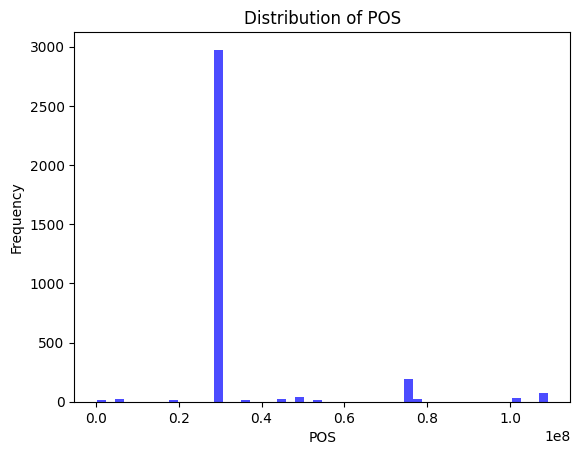

In [ ]:
import matplotlib.pyplot as plt

# Histogram for POS
plt.hist(df["POS"], bins=50, color='blue', alpha=0.7)
plt.title("Distribution of POS")
plt.xlabel("POS")
plt.ylabel("Frequency")
plt.show()


In [ ]:
print("Minimum POS:", df["POS"].min())
print("Maximum POS:", df["POS"].max())

hotspot_region = df[(df["POS"] >  2.8e5) & (df["POS"] < 2.9e5)]
print(hotspot_region.head())


Minimum POS: 283118
Maximum POS: 109092755
       CHROM     POS       ID REF ALT QUAL ALLELEID         CLNDISDB  \
267643     2  283118  3286740   T   G    .  3451611  MedGen:CN169374   
267644     2  286153  2551227   G   A    .  2721522  MedGen:CN169374   
267645     2  286296  3111557   G   T    .  3268232  MedGen:CN169374   
267646     2  286312  3111555   G   C    .  3268230  MedGen:CN169374   
267647     2  287612  2539325   C   G    .  2708303  MedGen:CN169374   

                CLNDN                   CLNHGVS  ... AF_ESP CLNSIGCONF CLNVI  \
267643  not_specified  NC_000002.12:g.283118T>G  ...    NaN        NaN   NaN   
267644  not_specified  NC_000002.12:g.286153G>A  ...    NaN        NaN   NaN   
267645  not_specified  NC_000002.12:g.286296G>T  ...    NaN        NaN   NaN   
267646  not_specified  NC_000002.12:g.286312G>C  ...    NaN        NaN   NaN   
267647  not_specified  NC_000002.12:g.287612C>G  ...    NaN        NaN   NaN   

       CLNDISDBINCL CLNDNINCL CLNSIGINCL  O

In [ ]:
# Find most frequent POS values
print(df["POS"].value_counts().head())


POS
29920251    5
29225518    4
29920232    4
29196820    3
29193825    3
Name: count, dtype: int64


In [ ]:
# Group by CHROM and summarize POS ranges
chrom_summary = df.groupby("CHROM")["POS"].agg(["min", "max", "count"])
print(chrom_summary)


             min        max  count
CHROM                             
11      43882695  107560868     83
12     109088232  109092755     14
14      77673822   77707983     27
15      49170336   49367562     40
17      18184290   75765180    203
19       6372831   36014181     33
2         283118   29921581   2988
7      102457492  102464827     32
8       52539869   52565226     12


In [ ]:
# Filter for Chromosome 2
chrom_2_data = df[df["CHROM"] == "2"]
print(chrom_2_data["POS"].value_counts().head())


POS
29920251    5
29920232    4
29225518    4
29920467    3
29920340    3
Name: count, dtype: int64


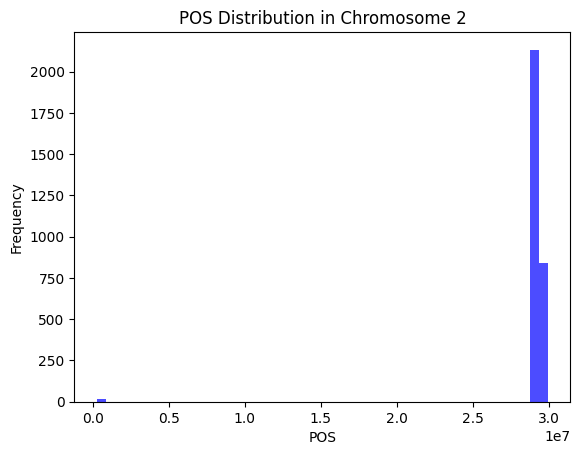

In [ ]:
# Histogram for Chromosome 2
import matplotlib.pyplot as plt

plt.hist(chrom_2_data["POS"], bins=50, color="blue", alpha=0.7)
plt.title("POS Distribution in Chromosome 2")
plt.xlabel("POS")
plt.ylabel("Frequency")
plt.show()


In [ ]:
dense_region = chrom_2_data[(chrom_2_data["POS"] > 283000) & (chrom_2_data["POS"] < 300000)]
print(dense_region)

print(dense_region[["POS", "GENEINFO", "CLNDN", "CLNSIG"]].head())


       CHROM     POS       ID REF ALT QUAL ALLELEID         CLNDISDB  \
267643     2  283118  3286740   T   G    .  3451611  MedGen:CN169374   
267644     2  286153  2551227   G   A    .  2721522  MedGen:CN169374   
267645     2  286296  3111557   G   T    .  3268232  MedGen:CN169374   
267646     2  286312  3111555   G   C    .  3268230  MedGen:CN169374   
267647     2  287612  2539325   C   G    .  2708303  MedGen:CN169374   
267648     2  287652  3286748   G   A    .  3451619  MedGen:CN169374   
267649     2  287670  2481180   G   A    .  2451173  MedGen:CN169374   
267650     2  287721  3286726   G   A    .  3451597  MedGen:CN169374   
267651     2  287732  3111545   T   C    .  3268220  MedGen:CN169374   
267653     2  287744  3286735   G   C    .  3451606  MedGen:CN169374   
267654     2  287760  3111568   C   G    .  3268243  MedGen:CN169374   
267655     2  287768  3111563   C   G    .  3268238  MedGen:CN169374   
267656     2  287784  2519173   C   T    .  2682064  MedGen:CN16